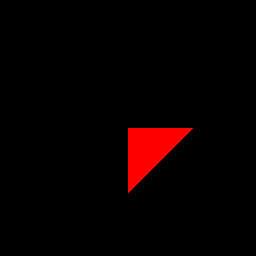

In [23]:
# We setup an embree device and scene as we did in the minimal tutorial
# We also declare some helper functions to create geometry, rays and output intersection results, see the minimal tutorial for more information on this
#from common import create_triangle, create_ray, print_hit

import pyrootutils
import os
pyrootutils.setup_root(os.getcwd(), indicator="CMakeLists.txt", pythonpath=True)

from tutorials.common import create_triangle, create_ray, print_hit

import pyembree as pe
import ctypes
import numpy as np

d = pe.rtcNewDevice(None)
s = pe.rtcNewScene(d)

# We crate two triangles
create_triangle(d, s)
pe.rtcCommitScene(s)


# Create an image
from PIL import Image
im = PIL.Image.new(mode = "RGB", size=(256, 256), color = (0, 0, 0))

# Collect rays in a python list, use an othrographic projection to create rays
left = -2.0
right = 2.0
bot = -2.0
top = 2.0
width = right - left
height = top - bot

import itertools
xy = list(itertools.product(range(0, im.size[0]), range(0, im.size[1])))
rayhits = [create_ray(left + width / im.size[0] * x, bot + height / im.size[1] * y, -1, 0, 0, 1) for x,y in xy]

# Intersect all rays in the list.
# Intersection calls are done in parallel, we can define the number of threads used in the last function argument. 0 will use the maximum of the hardware capabilities.
pe.rtcIntersectN(s, rayhits, None, 0)


pixels = im.load()
for rh, (x, y) in zip(rayhits, xy):
  if rh.hit.geomID != pe.RTC_INVALID_GEOMETRY_ID:
    pixels[x, y] = (255, 0, 0)
  

display(im)

pe.rtcReleaseScene(s)
pe.rtcReleaseDevice(d)
 